## Torsion potential energy of the a03ws and C36m force fields as a function of the omega angle.

In [2]:
# Import useful things 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# force fields colours (a= simulation, b=reweighted for each force field) 
a_a03ws = (1,0.6471,0) #FFA500(255,165,0) 
b_a03ws = (0.6,0.39,0) #996300(153, 99, 0)
a_a03ws_run2 = (0,0.8,0.8) #00cdcd(0,205,205)
b_a03ws_run2 = (0,0.34,0.34) #005757(0,87,87)
a_a99sb = (0.86,0.08,0.24) #dc143c(220,20,60)
a_c36m = (0.39,0.58,0.93) #6495ED(100,149,237)
b_c36m = (0.16,0.23,0.37) #283B5E(40,59,94)

In [4]:
# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', size=8)

Taken from ffbonded.itp file for each force field 

a03ws:  X   C   N   X     9     180.0     10.46000     2  ; AA,NMA

a99sb: same as a03ws

C36m:  CT1        C        N      CP1     9   180.000000    11.506000     2

Assuming 

http://archive.ambermd.org/201510/0079.html (1/2 term in AMBER dihedral angle is accounted for in the constant)

In [6]:
# Define the range of omega angles from -180 to +180
omega_values = np.linspace(-180, 180, 1000)

# Define the energy function
a03ws = 10.46 * (1 + np.cos(2 * np.radians(omega_values) - np.radians(180)))
a99sb = 10.46 * (1 + np.cos(2 * np.radians(omega_values) - np.radians(180)))
c36m = 11.56 * (1 + np.cos(2 * np.radians(omega_values) - np.radians(180)))

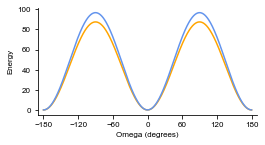

In [7]:
import matplotlib.pyplot as plt

# Set the figure size in millimeters
fig, ax = plt.subplots(figsize=(100/25.4, 50/25.4))  # Convert mm to inches (1 inch = 25.4 mm)

# Convert to kj/mol

# Plot the data using the axes object
ax.plot(omega_values, a03ws*4.184, color=a_a03ws)
# ax.plot(omega_values, a99sb, color=a_a99sb)
ax.plot(omega_values, c36m*4.184, color=a_c36m)

# Set the labels for the axes
ax.set_xlabel('Omega (degrees)')
ax.set_ylabel('Energy')

# Set the x-axis range from -180 to +180 degrees
ax.set_xlim(-190, 190)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-ticks from -180 to 180 at intervals of 30 degrees
ax.set_xticks(range(-180, 181, 60))

# Save the figure
plt.savefig('ff_energy.pdf', format='pdf', dpi=2000, transparent=True, bbox_inches='tight')
